# Perceptron

O perceptron é um algoritmo de aprendizado de máquina simples proposta por Frank [Rosenblatt](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) em 1958. A ideia básica é construir uma reta que separa as duas classes, o perceptron foi proposto originalmente para classificação binária. Também é possível utilizá-lo em problemas multi-classes, através das estratégias One vs. One (OvO) e One vs. Rest (OvR).

Na imagem a seguir você pode ver uma representação gráfica do perceptron.

Agora, vamos ao algoritmo!


<img src="https://drive.google.com/uc?id=1pMGt9okSnjYOAzUxL2rbvDujGfSApHHi" />

## Algoritmo do Perceptron

    Iniciar peso de cada conexão com o valor 0

    Repita

        Para cada par de treinamento (X, y)

            Calcular a saída f(net)

\begin{equation}
net = (\sum^{m}_{i=1} x_i w_i) + w_0 
\end{equation}
$$
f(net)=
\begin{cases}
1 & \text{se } net \geq \theta \\
-1,              & \text{senão}
\end{cases}
$$
        
            Se (y ≠  f(net))

                Atualizar pesos do neurônio

\begin{cases}
w_{i}^{*} = w_i + \eta (y - f(net)) & \text{se } i = 0 \\
w_{i}^{*} = w_i + x_i \eta (y - f(net)),              & \text{senão}
\end{cases}
            
    Até condição de parada

A partir deste algoritmo que foi explicado em aula, vamos codificar o perceptron em python.

In [16]:
import numpy as np


class Perceptron(object):  
    """Perceptron.
    Parametros
    ------------
    eta : real
    Taxa de aprendizado (entre 0.0 e 1.0)
    n_iter : inteiro
    Numero de iterações
    random_state : inteiro
    Semente para geração de numeros aleatórios
    
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Números de erros em cada época.

    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
       
    def fit(self, X, y):
        """Função de treinamento e ajuste do modelo aos dados.
        Parâmetros
        ----------
        X : {array-like}, dimensões = [m,n]
        Matriz com atributos preditivos, onde m é o número de observações e
        n é o número de atributos preditivos.
        y : array-like, dimensões = [m]
        Valores do atributo alvo.
        
        Retorna
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if(target != self.predict(xi)):
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if(errors == 0):
                break
        return self

    def net_input(self, X):
        """Calcula a entrada da rede"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Retorna a classe após a aplicação da função sinal"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Agora vamos pegar o exemplo do exercício para fazermos o nosso treinamento:
Por simplicidade, faremos a seguinte codificação:
- Febre = {sim: 1, não: 0}
- Enjôo = {sim: 1, não: 0}
- Manchas = {grandes: 1, pequenas: 0}
- Dores = {sim: 1, não: 0}

- Diagnóstico = {doente: 1, saudável: -1}

Essa codificação foi feita devido aos algoritmos baseados em otimização trabalharem apenas com dados numéricos. Caso o seu atributo preditivo e atributo alvo seja categórico é necessário fazer a conversão. No sklearn vocês já conhecem as funções que fazem estes procedimentos.

In [17]:
X = np.array([[1,1,0,1],[0,0,1,0],[0,1,0,0],[1,1,1,1],[1,0,0,1],[0,0,1,1]])

y = np.array([1,-1,-1,1,-1,1])

Agora vamos treinar o nosso perceptron e descobrir o que ele diz sobre o estado de saúde do Luís e da Laura.

In [18]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn_fit = ppn.fit(X, y)

print("Luís: "+str(ppn_fit.predict([0,0,0,1])))
print("Laura: "+str(ppn_fit.predict([1,1,1,1])))

Luís: -1
Laura: 1


No caso, ele estimou que o Luís está saudável, o que é razoável visto que ele só apresentou um dos sintomas.

E a Laura está doente, o que é razoável visto que ela apresentou todos os sintomas.

Agora vamos ver os erros da rede e os pesos!

In [19]:
print(ppn_fit.errors_)
print(ppn_fit.w_)

[4, 4, 0]
[-0.04  0.    0.02  0.02  0.02]


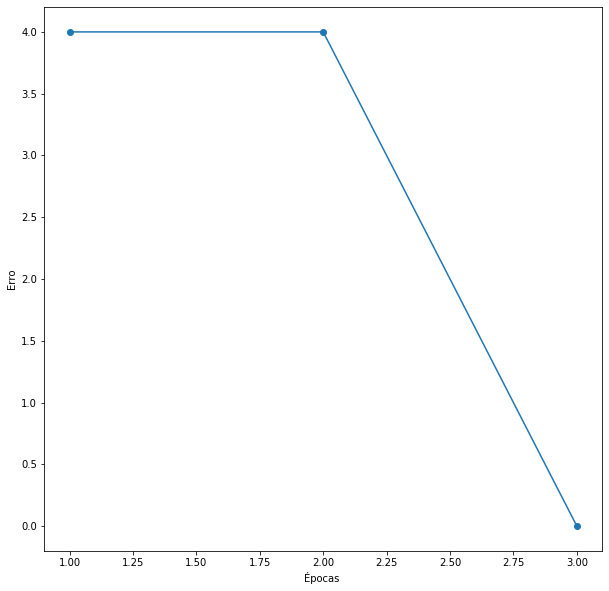

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas ')
plt.ylabel('Erro')
plt.show()

Por ser muito simples, em apenas 3 iterações o nosso erro já era igual a zero, então poderíamos colocar apenas 3 iterações ou um critério de parada. Se o erro no conjunto de treinamento for igual a zero, termine a execução.

É interessante notar que o perceptron foi proposto para classificação, onde as classes são linearmente separáveis.

Mas, e se eu quizesse usar algo parecido com o perceptron para regressão?

Note, no perceptron estamos criando uma reta $r = wx + b$ que separa 2 classes. Isso te lembra algum método?

Sim, o equivalente do perceptron para regressão é a boa e velha **Regressão Linear** que cria uma função da reta $r = ax + b$ para encontrar a reta que melhor se ajusta aos dados.

# Perceptron no sklearn

Agora vamos ver como utilizar o perceptron no sklearn

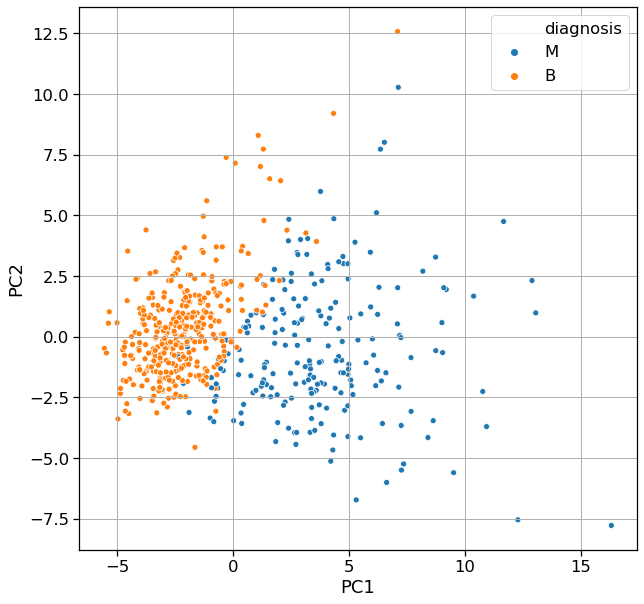

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing


wisconsin = pd.read_csv("wisconsin.csv")

X_array = wisconsin.drop(["id", "diagnosis"], axis = 1)
y_array = wisconsin["diagnosis"]

le = preprocessing.LabelEncoder()
le_fit = le.fit(["M", "B"])
y_trans = le_fit.transform(y_array)

X_norm = StandardScaler().fit_transform(X_array)
X_pca = PCA(n_components=2).fit_transform(X_norm)

principalDf = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([principalDf, y_array], axis = 1)

fig = plt.figure(figsize = (10,10))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.scatterplot(x="PC1", y="PC2", hue="diagnosis", data=PCA_df)
ax.grid()


## Pegando uma função emprestada

Na tutoria que abordava sobre viés-variância, o Victor utilizou esta função para plotar a fronteira de decisão.
Vamos utilizar ela novamente para ver como o perceptron dividirá o espaço.

In [22]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    
    classes = np.unique(y)

    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Right now it only works with binary tasks: expand both dictionaries or use cmap for multiclass tasks
    colors = {0:'red', 1:'green'}
    markers = {0: 'o', 1: '^'}
    
    # Plotting
    #plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlGn')
    for class_v in classes:
        imask = y == class_v
        plt.scatter(X[imask, 0], X[imask, 1], c=colors[class_v], alpha=0.8, marker=markers[class_v])
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdYlGn')
    plt.xlabel("x1",fontsize=15)
    plt.ylabel("x2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

Agora vamos ver como é a fronteira de decisão do perceptron:

<module 'matplotlib.pyplot' from '/home/moises/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

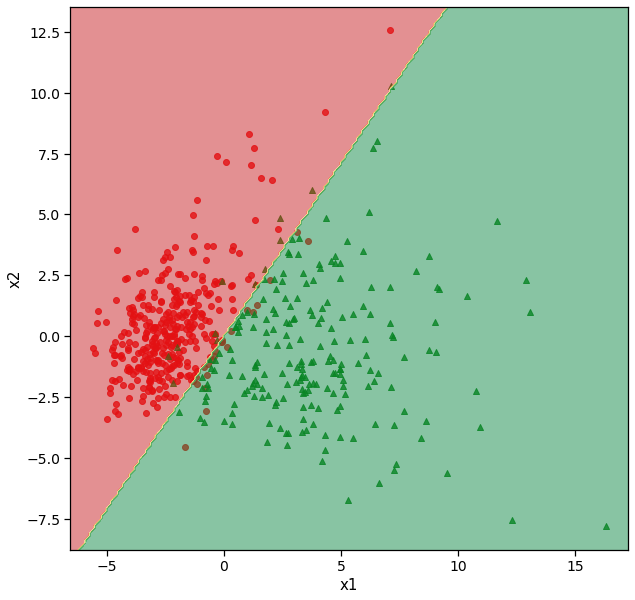

In [29]:
fig = plt.figure(figsize = (10,10))
plot_decision_boundaries(X_pca, y_trans, Perceptron, random_state=1, max_iter=100)

Sem nenhuma surpresa, a fronteira de decisão o perceptron é uma reta que divide as duas classes!

Agora vamos relembrar a avaliação de desempenho. Vamos utilizar o campeão da tutoria do KNN e comparar o desempenho dele com o perceptron.

In [34]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state=42)

model_per = make_pipeline(StandardScaler(), Perceptron(max_iter=100, random_state=0))
performance_per = cross_val_score(model_per, X_array, y_array, cv=cv, scoring = "balanced_accuracy")

print("Desempenho do Perceptron em 10-fold cv")
#print(performance_per)
print("Performance média do Perceptron: "+str(np.mean(performance_per)))
print("Desvio padrão do Perceptron: "+str(np.std(performance_per)))

Desempenho do Perceptron em 10-fold cv
Performance média do Perceptron: 0.9600714285714286
Desvio padrão do Perceptron: 0.0293692721815332


In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, metric = 'manhattan'))
performance_knn = cross_val_score(model_knn, X_array, y_array, cv=cv, scoring = "balanced_accuracy")

print("Desempenho do KNN em 10-fold cv")
#print(performance_knn)
print("Performance média do KNN: "+str(np.mean(performance_knn)))
print("Desvio padrão do KNN: "+str(np.std(performance_knn)))

Desempenho do KNN em 10-fold cv
Performance média do KNN: 0.9616075036075037
Desvio padrão do KNN: 0.02511322593711308


## Teste bayesiano hierarquico para termos confiança no nosso resultado!

(0.44572846493509166, 0.5542715350649083)


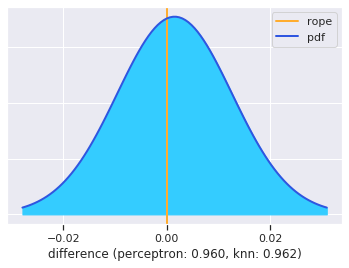

In [36]:
import baycomp

names = ("perceptron", "knn")

probs, fig = baycomp.two_on_single(performance_per, performance_knn, runs=10, plot=True, names=names)

print(probs)

![Thatsall](https://media.giphy.com/media/JLtQeoVXD5yKI/giphy.gif)